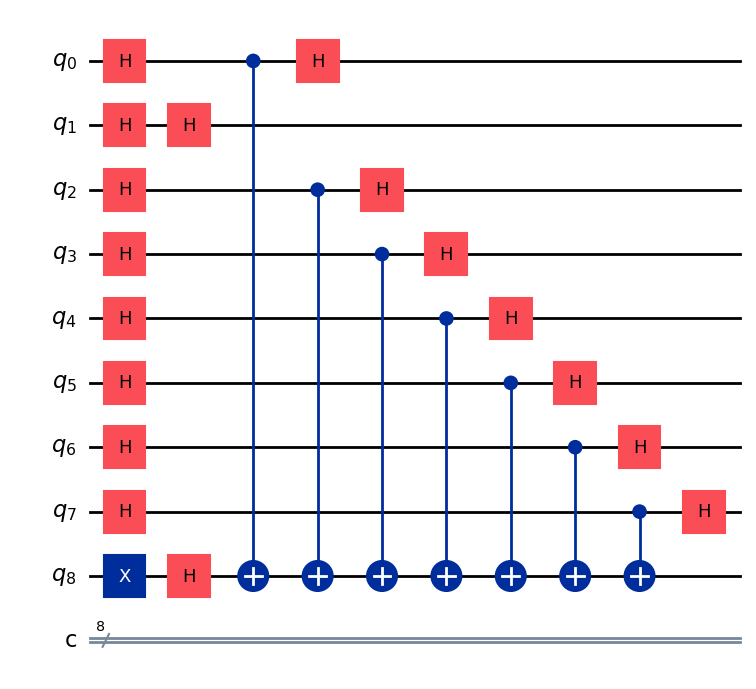

In [6]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

# Define the secret string
secret_string = '10111111'

# Create the quantum circuit
n = len(secret_string)
circuit = QuantumCircuit(n + 1, n)
#n+1 quantum bits and n Clasical bits

# Initialize ancilla qubit to |->
circuit.x(n)
#flip ancilla bit by X ==1
circuit.h(n)
#apply H to bring into |->


# Apply Hadamard gates to input qubits
circuit.h(range(n))
#applying to all input bits

# Oracle (encoding the secret string)
for i, bit in enumerate(secret_string):
    if bit == '1':
        circuit.cx(i, n)

# Apply Hadamard again
circuit.h(range(n))
circuit.draw(output='mpl')



In [7]:
# Measure the input qubits
circuit.measure(range(n), range(n))
#collapses quantum bits to classical bits


# Simulate the circuit
simulator = AerSimulator()
job = simulator.run(circuit, shots=1000)
result = job.result()
counts = result.get_counts()

# Print and visualize the result
print("Counts:", counts)
print("Most likely outcome:", max(counts, key=counts.get))


Counts: {'11111101': 1000}
Most likely outcome: 11111101


In [3]:
plot_histogram(counts).show()
plt.show()



/var/folders/bs/c817j_h562s162nhzw5z2pt40000gq/T/ipykernel_89437/562131173.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts).show()
